<div align="center">
    <font color="0F5298" size="7">
        Deep Learning <br>
    </font>
    <font color="2565AE" size="5">
        CE Department <br>
        Spring 2024 - Prof. Soleymani Baghshah <br>
    </font>
    <font color="3C99D" size="5">
        HW2 Practical <br>
    </font>
    <font color="696880" size="5">
        30 Points
    </font>
</div>


In [ ]:
FULLNAME = 'YOUR NAME'
STD_ID = 'YOUR ID'

In this notebook, we aim to perform **classification** on images from the **CIFAR10** dataset using CNN networks. First, we load the dataset and apply the necessary transformations for normalization and augmentation. After that, we visualize some samples. Once we familiarize ourselves with the dataset, we proceed to design the desired convolutional network, which is explained in the relevant section. After designing the model, we move on to training and evaluating it. At the end of the first section, we analyze the feature space from different perspectives. First, using the KNN method, we examine the closest samples to each other in the feature space. Then, we cluster the data and finally visualize the outputs of the intermediate layers of the model.

In the second part of the notebook, we perform a simple transfer learning task on the trained model from the first section but using a new dataset, **CIFAR100**. To do this, we modify the final layer of the network and retrain it. Further details are provided in the relevant section. Finally, we evaluate the model’s accuracy on the new task and analyze the extracted features and how well the model generalizes. After designing and training the model, we will further analyze the extracted feature space. Finally, we will evaluate the generalization ability of the model and its extracted features on a new dataset,

# CIFAR10 Classification

## Import Libraries

Import needed libraries

In [ ]:
import torch
import torchvision
from torchvision import transforms
import matplotlib.pyplot as plt
from torch import nn
import torch.nn.functional as F
import tqdm
from time import time
import random
from sklearn.manifold import TSNE
import numpy as np
from random import sample
import math
import torch.optim as optim
import seaborn as sns

## Device

Set device to work with (GPU or CPU)

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

## Transforms & Dataset & Dataloader

Here, you should download and load the dataset with the desire transforms. After that, you should split train dataset to train and validation sets. Finally, define the dataloaders for `train`, `validation` and `test`

In [ ]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
# TODO: Data Transforms

# TODO: Load Train Data

# TODO: Split Train and Validation Data

# TODO: Load Test Data

# TODO: Define Data Loaders


Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


## Visualization

Visualize 5 random images from each class in different columns

- **Hint**:  You can use `plt.subplots` for visualization

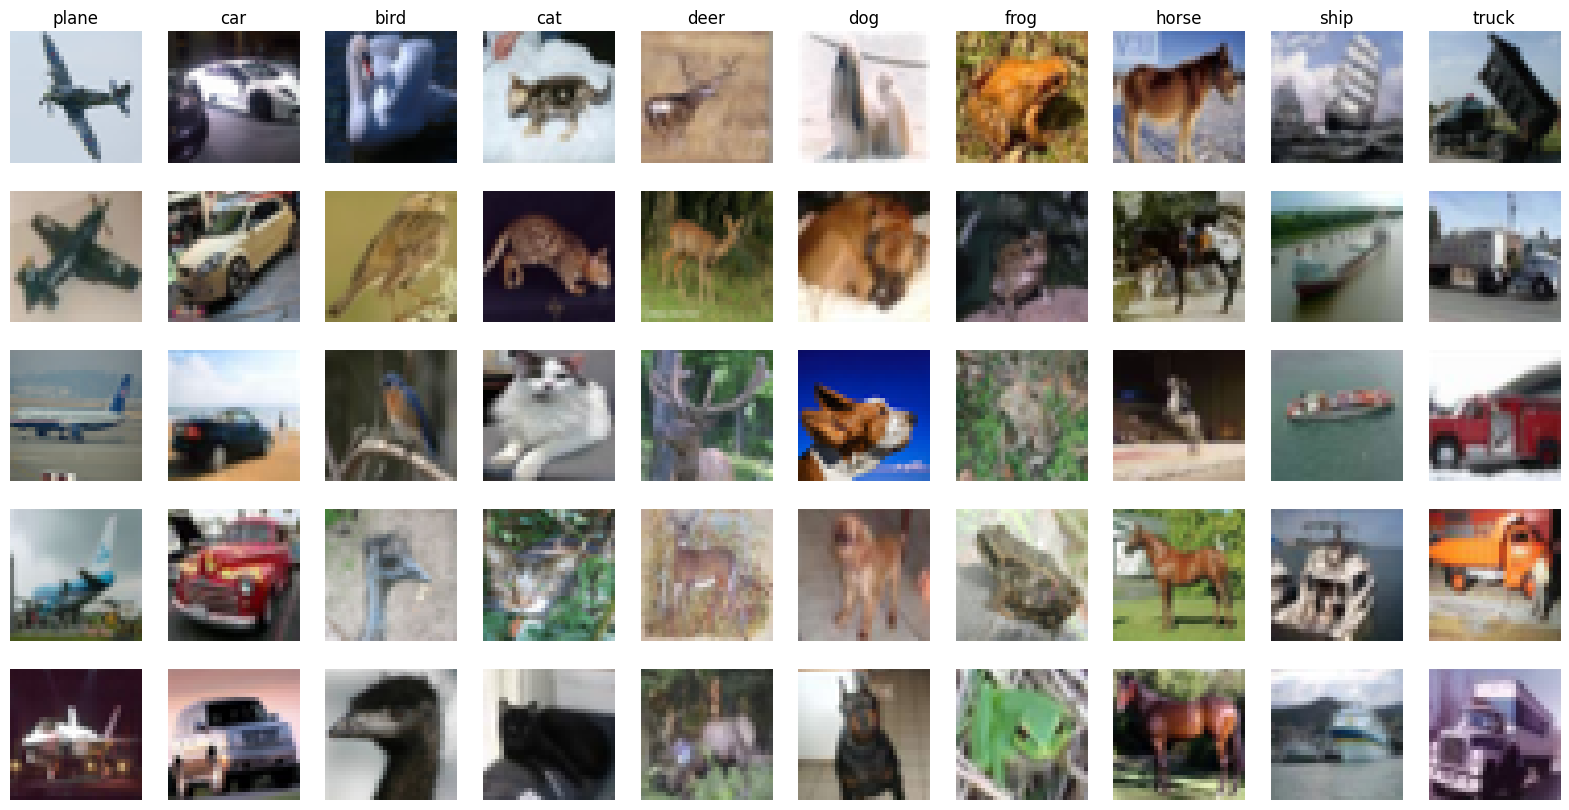

In [ ]:
# TODO: Find 5 Images from Each Class

# Plot Images


## Model

Define your model here from scratch (You are not allowed to use the existing models in pytorch)

**NOTICE:** The model that you will have defined outputs a vector containing 10 numbers (for each class). Define a "feature space" that is a vector of size *N* (where *N > 10*) right before the last layer (You can then have a last layer like `nn.Linear(N, 10)`). See the image below to get a better understanding. We will use this later (we want to access the feature space of a sample when the sample is given to the model). The model tries to learn a representation of the samples in this feature space and we will see how good it could do this in later sections.

![Feature Space In Neural Network](https://i.postimg.cc/28Qjcn9D/feature-space-vis.png)

- **Hint I**: Our goal is to get accuracy above *90%* on testset. Our suggestion is to implement ResNet (ResNet18 could be a viable choice)
  - You can learn the network's structure and implementation online (Youtube, ...) and then implmenet it yourself and make changes to enhance it's performance on our task **(YOU SHOULD NOT COPY THE CODE!!! OTHERWISE, YOU'LL BE PENALIZED!!!)**

- **Hint II**: When defining your model, pay attension to the **NOTICE** part in the above. It's also better to read the "Exploring the feature space" section beforehand.  

In [ ]:
# TODO: Implement Model

## Train

### Model instantiation

Create an instance of your model and move it to `device`

In [ ]:
# TODO: Define Model

### Criterion & Optimizater

Define `criterion` and `optimizer` (Or `scheduler`)

In [ ]:
# TODO: Define Loss and Optimizer

### Train loop

Train your model

Tasks:
- [ ] Things that are needed to be printed in each epoch:
  - Number of epoch
  - Train loss
  - Train accuracy
  - Validation loss
  - Validation accuracy
- [ ] save train/validation loss and accuracy (of each epoch) in an array for later usage

In [ ]:
# TODO: Implement Training Loop

In [ ]:
# TODO: Implement Validation Loop

In [ ]:
# TODO: Train The Model

Loss: 1.419e+00 - Acc: 49.12%: 100%|██████████| 20/20 [00:02<00:00,  8.57it/s]

 Epoch   1 finished in 41.14s



Loss: 9.342e-01 - Acc: 67.30%: 100%|██████████| 20/20 [00:03<00:00,  6.63it/s]

 Epoch   2 finished in 41.45s



Loss: 8.773e-01 - Acc: 69.38%: 100%|██████████| 20/20 [00:02<00:00,  9.21it/s]

 Epoch   3 finished in 40.39s



Loss: 7.770e-01 - Acc: 73.52%: 100%|██████████| 20/20 [00:02<00:00,  9.17it/s]

 Epoch   4 finished in 40.41s



Loss: 6.611e-01 - Acc: 77.58%: 100%|██████████| 20/20 [00:02<00:00,  9.09it/s]

 Epoch   5 finished in 40.30s



Loss: 8.616e-01 - Acc: 73.42%: 100%|██████████| 20/20 [00:02<00:00,  9.53it/s]

 Epoch   6 finished in 40.33s



Loss: 6.766e-01 - Acc: 76.96%: 100%|██████████| 20/20 [00:02<00:00,  9.53it/s]

 Epoch   7 finished in 40.19s



Loss: 5.125e-01 - Acc: 83.14%: 100%|██████████| 20/20 [00:02<00:00,  9.36it/s]

 Epoch   8 finished in 40.20s



Loss: 5.620e-01 - Acc: 81.40%: 100%|██████████| 20/20 [00:02<00:00,  7.46it/s]

 Epoch   9 finished in 41.00s



Loss: 4.839e-01 - Acc: 83.22%: 100%|██████████| 20/20 [00:02<00:00,  7.78it/s]

 Epoch  10 finished in 41.07s



Loss: 5.350e-01 - Acc: 82.64%: 100%|██████████| 20/20 [00:02<00:00,  9.35it/s]

 Epoch  11 finished in 40.34s



Loss: 4.889e-01 - Acc: 83.50%: 100%|██████████| 20/20 [00:02<00:00,  9.35it/s]

 Epoch  12 finished in 40.24s



Loss: 4.610e-01 - Acc: 84.86%: 100%|██████████| 20/20 [00:02<00:00,  9.19it/s]

 Epoch  13 finished in 40.28s



Loss: 4.573e-01 - Acc: 85.60%: 100%|██████████| 20/20 [00:02<00:00,  9.37it/s]

 Epoch  14 finished in 40.36s



Loss: 4.873e-01 - Acc: 84.80%: 100%|██████████| 20/20 [00:02<00:00,  9.31it/s]

 Epoch  15 finished in 40.37s



Loss: 3.981e-01 - Acc: 86.82%: 100%|██████████| 20/20 [00:02<00:00,  8.22it/s]

 Epoch  16 finished in 40.59s



Loss: 3.905e-01 - Acc: 87.80%: 100%|██████████| 20/20 [00:02<00:00,  6.83it/s]

 Epoch  17 finished in 41.47s



Loss: 3.824e-01 - Acc: 87.04%: 100%|██████████| 20/20 [00:02<00:00,  9.11it/s]

 Epoch  18 finished in 40.38s



Loss: 4.006e-01 - Acc: 87.62%: 100%|██████████| 20/20 [00:02<00:00,  9.34it/s]

 Epoch  19 finished in 40.42s



Loss: 4.194e-01 - Acc: 86.38%: 100%|██████████| 20/20 [00:02<00:00,  9.27it/s]

 Epoch  20 finished in 40.39s



Loss: 5.640e-01 - Acc: 83.84%: 100%|██████████| 20/20 [00:02<00:00,  9.24it/s]

 Epoch  21 finished in 40.37s



Loss: 4.464e-01 - Acc: 86.44%: 100%|██████████| 20/20 [00:02<00:00,  9.09it/s]

 Epoch  22 finished in 40.49s



Loss: 4.221e-01 - Acc: 87.58%: 100%|██████████| 20/20 [00:02<00:00,  8.31it/s]

 Epoch  23 finished in 40.66s



Loss: 4.887e-01 - Acc: 86.54%: 100%|██████████| 20/20 [00:03<00:00,  6.57it/s]

 Epoch  24 finished in 41.46s



Loss: 4.462e-01 - Acc: 86.46%: 100%|██████████| 20/20 [00:02<00:00,  9.31it/s]

 Epoch  25 finished in 40.38s



Loss: 3.972e-01 - Acc: 88.40%: 100%|██████████| 20/20 [00:02<00:00,  9.40it/s]

 Epoch  26 finished in 40.38s



Loss: 4.132e-01 - Acc: 87.64%: 100%|██████████| 20/20 [00:02<00:00,  9.43it/s]

 Epoch  27 finished in 40.38s



Loss: 3.768e-01 - Acc: 89.04%: 100%|██████████| 20/20 [00:02<00:00,  9.49it/s]

 Epoch  28 finished in 40.31s



Loss: 4.336e-01 - Acc: 88.18%: 100%|██████████| 20/20 [00:02<00:00,  8.91it/s]

 Epoch  29 finished in 40.48s



Loss: 4.408e-01 - Acc: 88.46%: 100%|██████████| 20/20 [00:02<00:00,  9.52it/s]

 Epoch  30 finished in 40.30s



Loss: 5.013e-01 - Acc: 87.26%: 100%|██████████| 20/20 [00:02<00:00,  7.08it/s]

 Epoch  31 finished in 41.24s



Loss: 4.400e-01 - Acc: 88.56%: 100%|██████████| 20/20 [00:02<00:00,  8.31it/s]

 Epoch  32 finished in 40.75s



Loss: 4.467e-01 - Acc: 88.16%: 100%|██████████| 20/20 [00:02<00:00,  9.41it/s]

 Epoch  33 finished in 40.32s



Loss: 4.189e-01 - Acc: 88.70%: 100%|██████████| 20/20 [00:02<00:00,  9.54it/s]

 Epoch  34 finished in 40.23s



Loss: 4.971e-01 - Acc: 87.54%: 100%|██████████| 20/20 [00:02<00:00,  9.20it/s]

 Epoch  35 finished in 40.29s



Loss: 3.823e-01 - Acc: 89.48%: 100%|██████████| 20/20 [00:02<00:00,  9.25it/s]

 Epoch  36 finished in 40.32s



Loss: 4.651e-01 - Acc: 87.98%: 100%|██████████| 20/20 [00:02<00:00,  9.59it/s]


 Epoch  37 finished in 40.29s


Loss: 4.111e-01 - Acc: 89.48%: 100%|██████████| 20/20 [00:02<00:00,  8.19it/s]

 Epoch  38 finished in 40.64s



Loss: 4.990e-01 - Acc: 88.20%: 100%|██████████| 20/20 [00:02<00:00,  7.05it/s]

 Epoch  39 finished in 41.35s



Loss: 4.006e-01 - Acc: 90.16%: 100%|██████████| 20/20 [00:02<00:00,  9.40it/s]


 Epoch  40 finished in 40.21s


Loss: 4.617e-01 - Acc: 88.48%: 100%|██████████| 20/20 [00:02<00:00,  9.30it/s]

 Epoch  41 finished in 40.23s



Loss: 4.568e-01 - Acc: 88.98%: 100%|██████████| 20/20 [00:02<00:00,  9.47it/s]

 Epoch  42 finished in 40.37s



Loss: 4.189e-01 - Acc: 89.86%: 100%|██████████| 20/20 [00:02<00:00,  9.23it/s]

 Epoch  43 finished in 40.39s



Loss: 4.419e-01 - Acc: 89.94%: 100%|██████████| 20/20 [00:02<00:00,  9.56it/s]

 Epoch  44 finished in 40.23s



Loss: 4.764e-01 - Acc: 88.94%: 100%|██████████| 20/20 [00:02<00:00,  8.56it/s]


 Epoch  45 finished in 40.47s


Loss: 4.026e-01 - Acc: 90.22%: 100%|██████████| 20/20 [00:02<00:00,  7.20it/s]

 Epoch  46 finished in 41.34s



Loss: 4.564e-01 - Acc: 90.24%: 100%|██████████| 20/20 [00:02<00:00,  9.36it/s]

 Epoch  47 finished in 40.30s



Loss: 4.609e-01 - Acc: 89.72%: 100%|██████████| 20/20 [00:02<00:00,  9.34it/s]

 Epoch  48 finished in 40.36s



Loss: 4.917e-01 - Acc: 88.94%: 100%|██████████| 20/20 [00:02<00:00,  9.55it/s]

 Epoch  49 finished in 40.34s



Loss: 4.327e-01 - Acc: 90.66%: 100%|██████████| 20/20 [00:02<00:00,  9.24it/s]

 Epoch  50 finished in 40.36s


### Save Model

Since changes need to be made to the model later on, it is advisable to save your model to avoid having to retrain it in case of any issues.

In [ ]:
# TODO: Save Model

<ipython-input-28-2885ffc4987c>:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(torch.load('net.pth'))


### Visualize Loss and Accuracy plot

Using the arrays that you have (from task 2 in the above section), visualize two plots: Accuracy plot (train and validation together) and Loss plot (train and validation together)

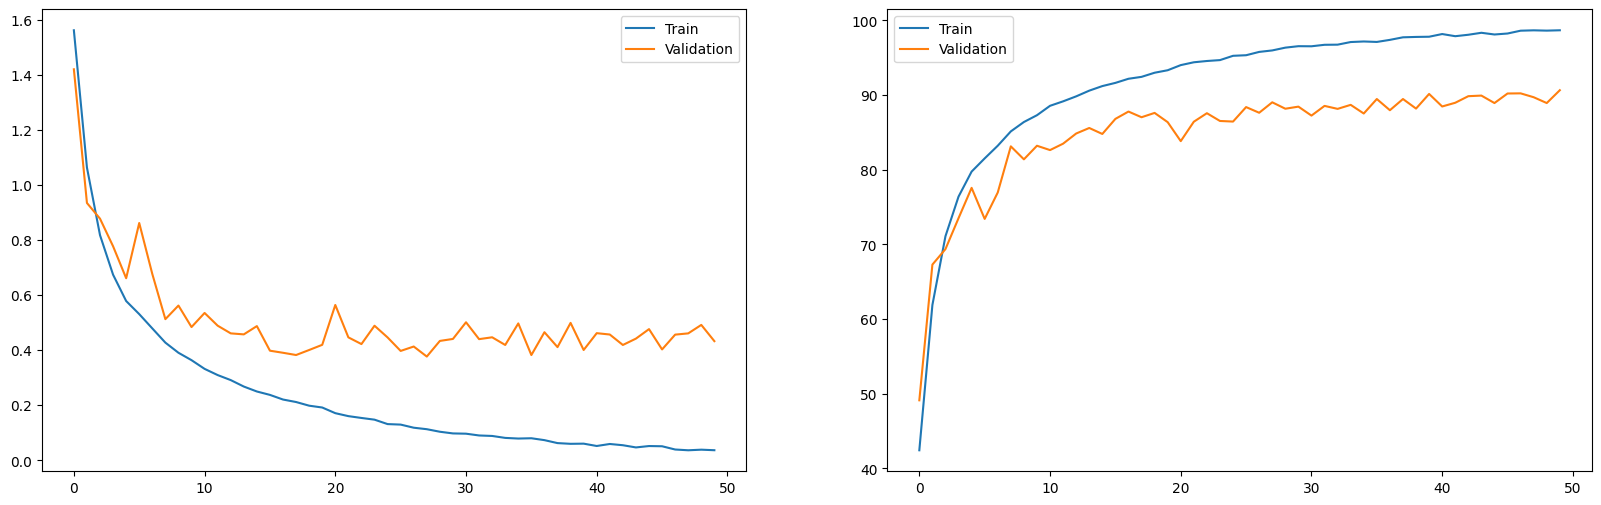

In [ ]:
# TODO: Plot Loss

# TODO: Plot Accuracy


## Evaluation

Test your trained model (using the Test Dataloader that you have). Our goal is to reach an accuracy above `90%`

In [ ]:
# TODO: Run Model on Testset

Loss: 4.968e-01 - Acc: 89.89%: 100%|██████████| 40/40 [00:03<00:00, 10.19it/s]


## Visualize incorrectly predicted samples from testset

Visualize *24* random images from testset that are incorrectly predicted by the model. Note that if you used normalization in the transform function for loading the data, you will need to unnormalize the images before displaying them.

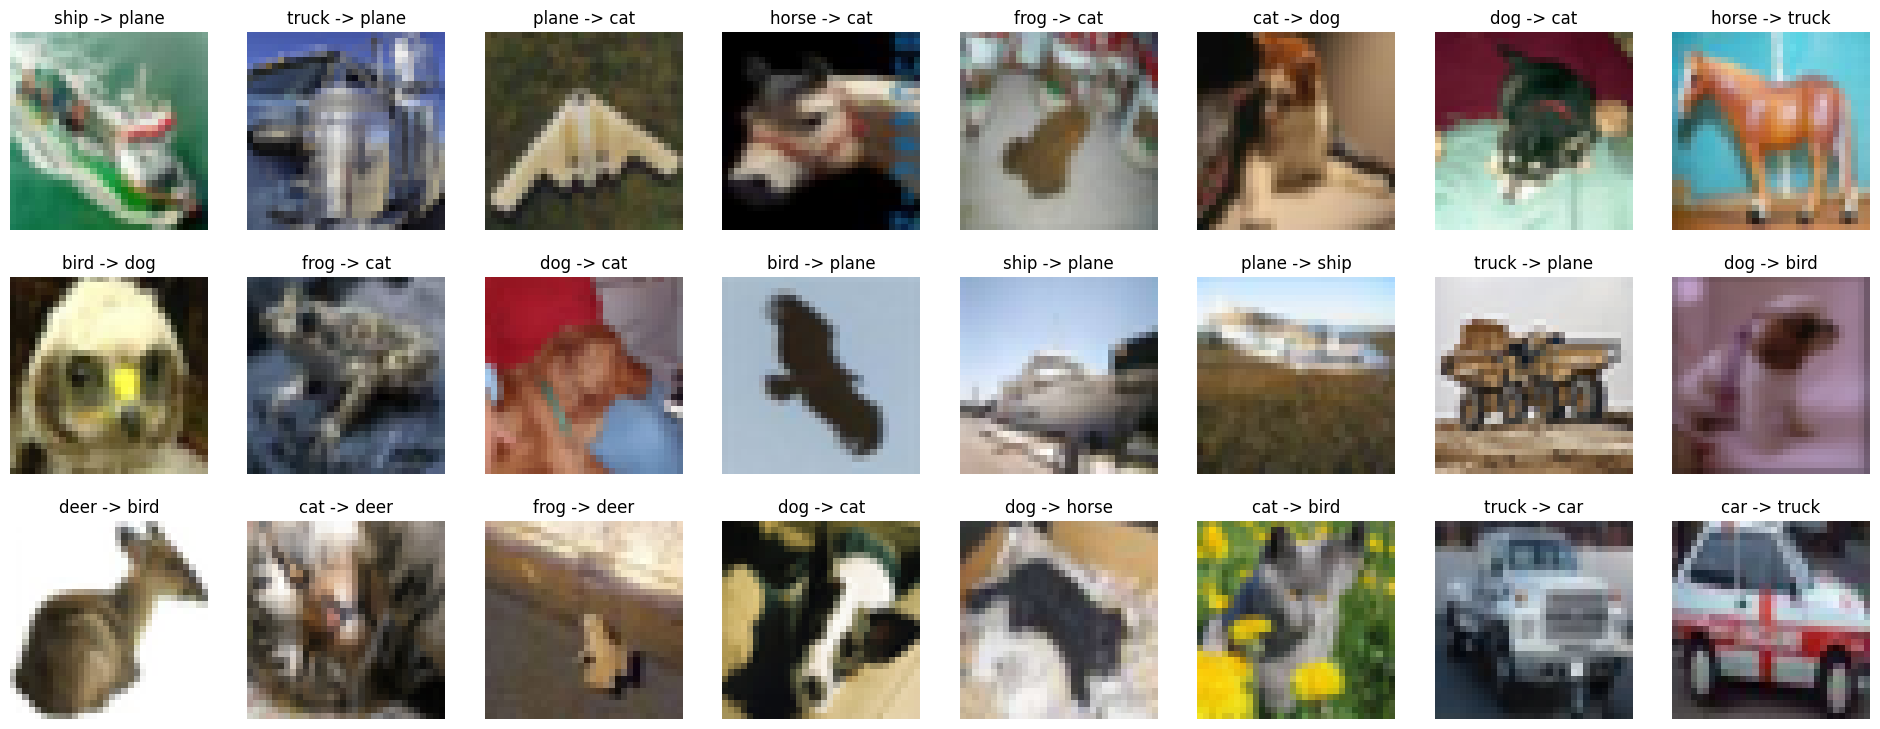

In [ ]:
# TODO: Plot Samples with Wrong Predicted Classes

## Exploring the feature space

### Calculate the feature space for all training samples

You have trained and evaluated your model. Now, for each sample in the trainset, calculate it's "feature space" discussed in the model section. The result of this section should be a tensor of size `(50000, N)` saved in a variable (for later usage)

- **Hint 1:** define a tensor with dimension `(50000, N)` where *50000* is the size of the trainset and *N* is the dimension of the feature space

- **Hint 2:** Pay attension to the `shuffle` attribute of your train dataloader (If needed)

In [ ]:
# TODO: Find Features and Put Them in One Dimensional List


### K Nearest Neighbor in feature space

You already have calculated the feature spaces for trainset ($S$) in the previous section

1. Get 5 random samples from testset which are correctly predicted by the model.
2. for each sample, calculate it's "feature space" ($X$)
3. for each sample, calculate it's *5* nearest neighbors in "feature space" in the trainset (by comparing $X$ to each row in $S$) and visualize them

**Note:** Your visualization should be something like the below picture

**Hint:** To find the nearest neighbors in the feature space, you can use any library of your choice.

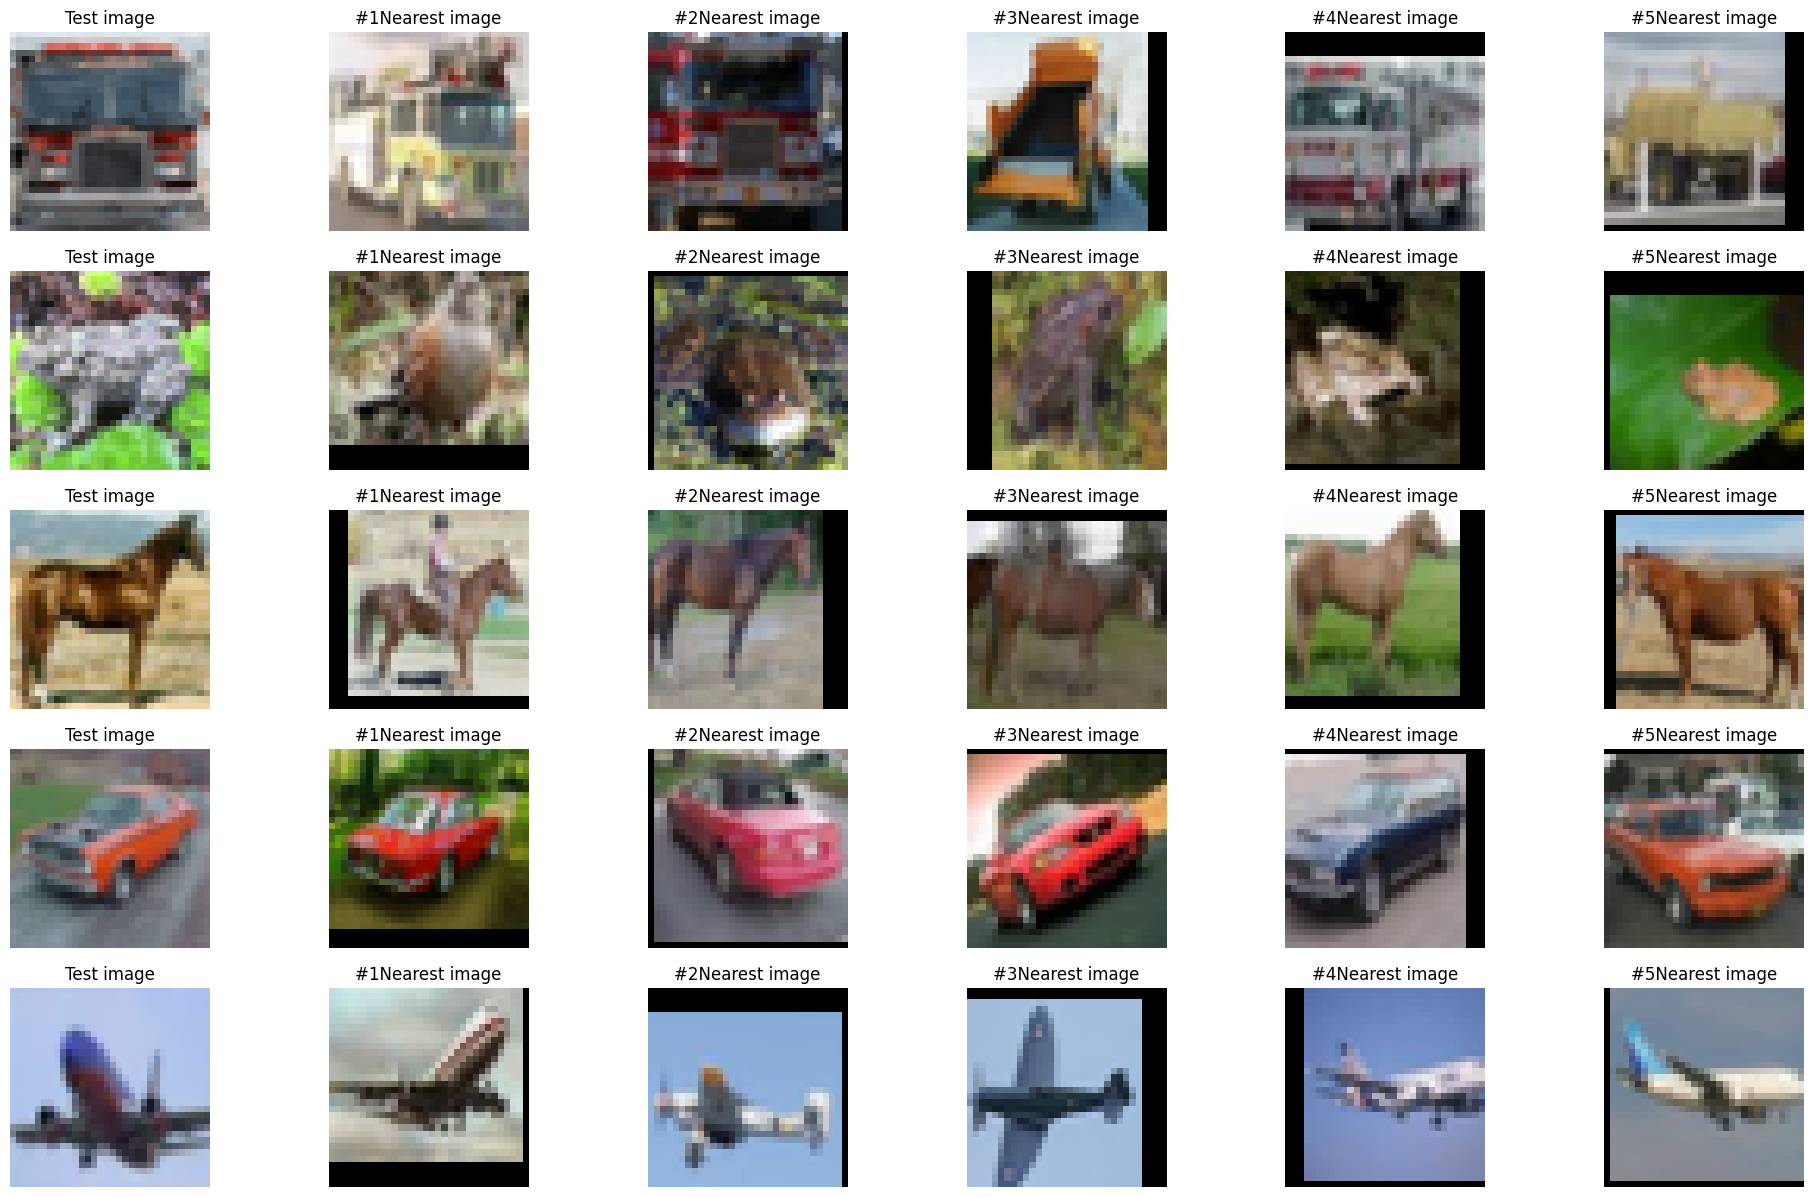

In [ ]:
# TODO: Find Features List for Test Samples

# Find K Nearest Features

# Plot Features' Images


### TSNE

1. Sample $M$ ($2000$ would be enought) random samples from the trainset feature space (calculated in the above sections)
2. Now you a vector of size `(M, N)` where $N$ is the dimension of the feature space
3. Using TSNE reduce $N$ to $2$ (Now you have a vector of size `(M, 2)`)
4. Print the shape of the output

**Hint:** You can use `sklearn.manifold.TSNE`

In [ ]:
# TODO: Get Samples

# TODO: Use TSNE


Visualize the points in a 2D plane (Set color of each point based on it's class)

**Notice:** Your visualization should be something like the below image

**Hint:** Use `plt.scatter(x, y, c=labels)`

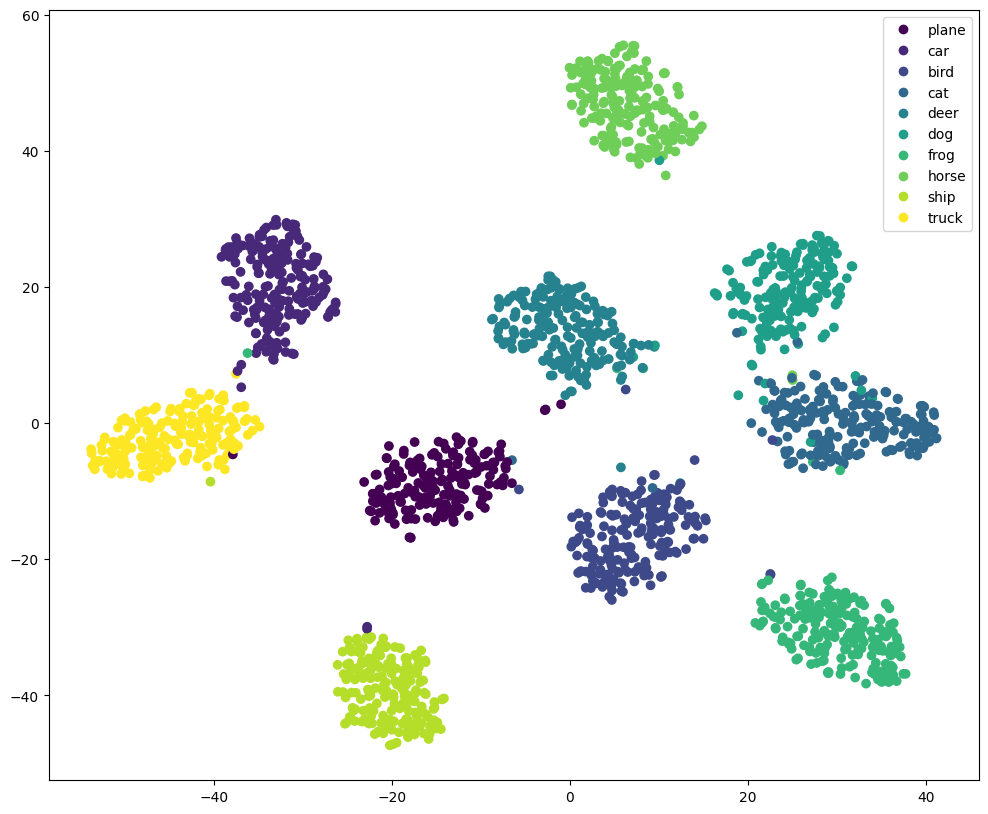

In [ ]:
# TODO: Plot Results

### Feature Map


In this part, we are going to visualize the output of one of the convolutional layers to see what features they focus on.

First, let's select a random image from dataset.

In [ ]:
# TODO: Select an Image


Now, we are going to *clip* our model at different points to get different intermediate representation.
* Clip your model at least at one point and plot the filters output. You can use the output of first Resnet block.

In order to clip the model, you can use `model.children()` method. For example, to get output only after the first 2 layers, you can do:

```
clipped = nn.Sequential(
    *list(model.children()[:2])
)
intermediate_output = clipped(input)
```



In [ ]:
# TODO: Get Intermediate Output


Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (downsample): Sequential()
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True,

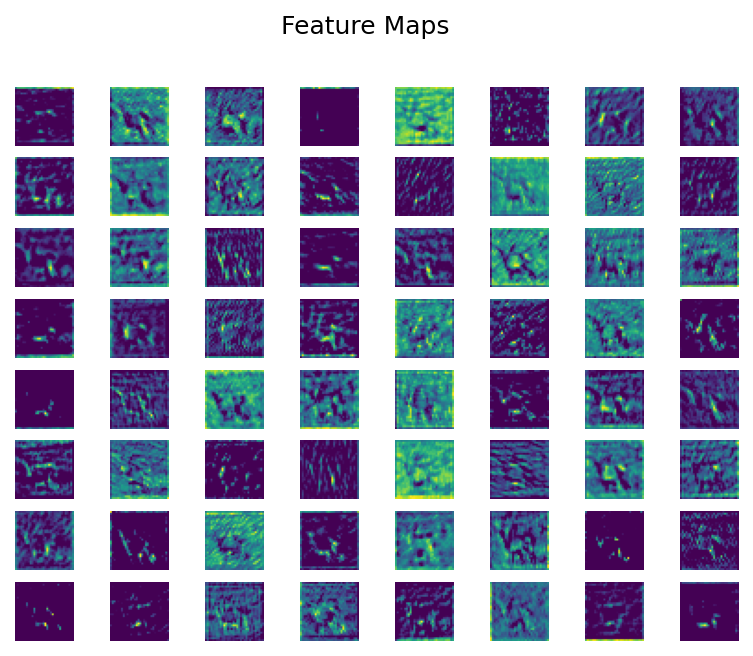

In [ ]:
def plot_intermediate_output(result, title=None):
    """ Plots the intermediate output of shape
      N_FILTERS x H x W
    """
    plt.rcParams['figure.dpi'] = 150
    n_filters = result.shape[1]
    N = int(math.sqrt(n_filters))
    M = (n_filters + N - 1) // N
    assert N * M >= n_filters

    fig, axs = plt.subplots(N, M)
    fig.suptitle(title)

    for i in range(N):
        for j in range(M):
            if i*N + j < n_filters:
                axs[i][j].imshow(result[0, i*N + j].cpu().detach())
                axs[i][j].axis('off')

# TODO: Plot Intermediate Output

## CIFAR100

In this section, we aim to test the trained model on a different dataset. For this purpose, we will use the CIFAR100 dataset, which is similar to CIFAR10 but has different types and numbers of classes. In order for the model to perform well on the new dataset, we need to modify the last layer of the model. As you know from the previous section, the last layer of the model is a linear layer that maps the features to the number of classes. In this section, due to the increase in the number of classes, we plan to modify this layer and train the new linear layer with the new dataset. Note that all other layers and weights of the model will remain fixed and unchanged; only the last layer will be retrained.

### Dataset & Dataloader

Here, you should download and load the dataset with the desire transforms.

In [ ]:
# TODO: Data Transforms

# TODO: Load Train and Test Data

# TODO: Define Data Loaders


Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


In [ ]:
classes = [
    "apple", "aquarium_fish", "baby", "bear", "beaver", "bed", "bee",
    "beetle", "bicycle", "bottle", "bowl", "boy", "bridge", "bus", "butterfly", "camel", "can", "castle", "caterpillar", "cattle", "chair", "chimpanzee",
    "clock", "cloud", "cockroach", "couch", "crab", "crocodile", "cup", "dinosaur", "dolphin", "elephant", "flatfish", "forest", "fox", "girl", "hamster",
    "house", "kangaroo", "keyboard", "lamp", "lawn_mower", "leopard", "lion", "lizard", "lobster", "man", "maple_tree", "motorcycle", "mountain", "mouse",
    "mushroom", "oak_tree", "orange", "orchid", "otter", "palm_tree", "pear", "pickup_truck", "pine_tree", "plain", "plate", "poppy", "porcupine", "possum",
    "rabbit", "raccoon", "ray", "road", "rocket", "rose", "sea", "seal", "shark", "shrew", "skunk", "skyscraper", "snail", "snake", "spider",
    "squirrel", "streetcar", "sunflower", "sweet_pepper", "table", "tank", "telephone", "television", "tiger", "tractor", "train",
    "trout", "tulip", "turtle", "wardrobe", "whale", "willow_tree", "wolf", "woman", "worm"
]
print(len(classes))

100


### Visualization

Visualize 1 random images from each class.

- **Hint**:  You can use `plt.subplots` for visualization

100


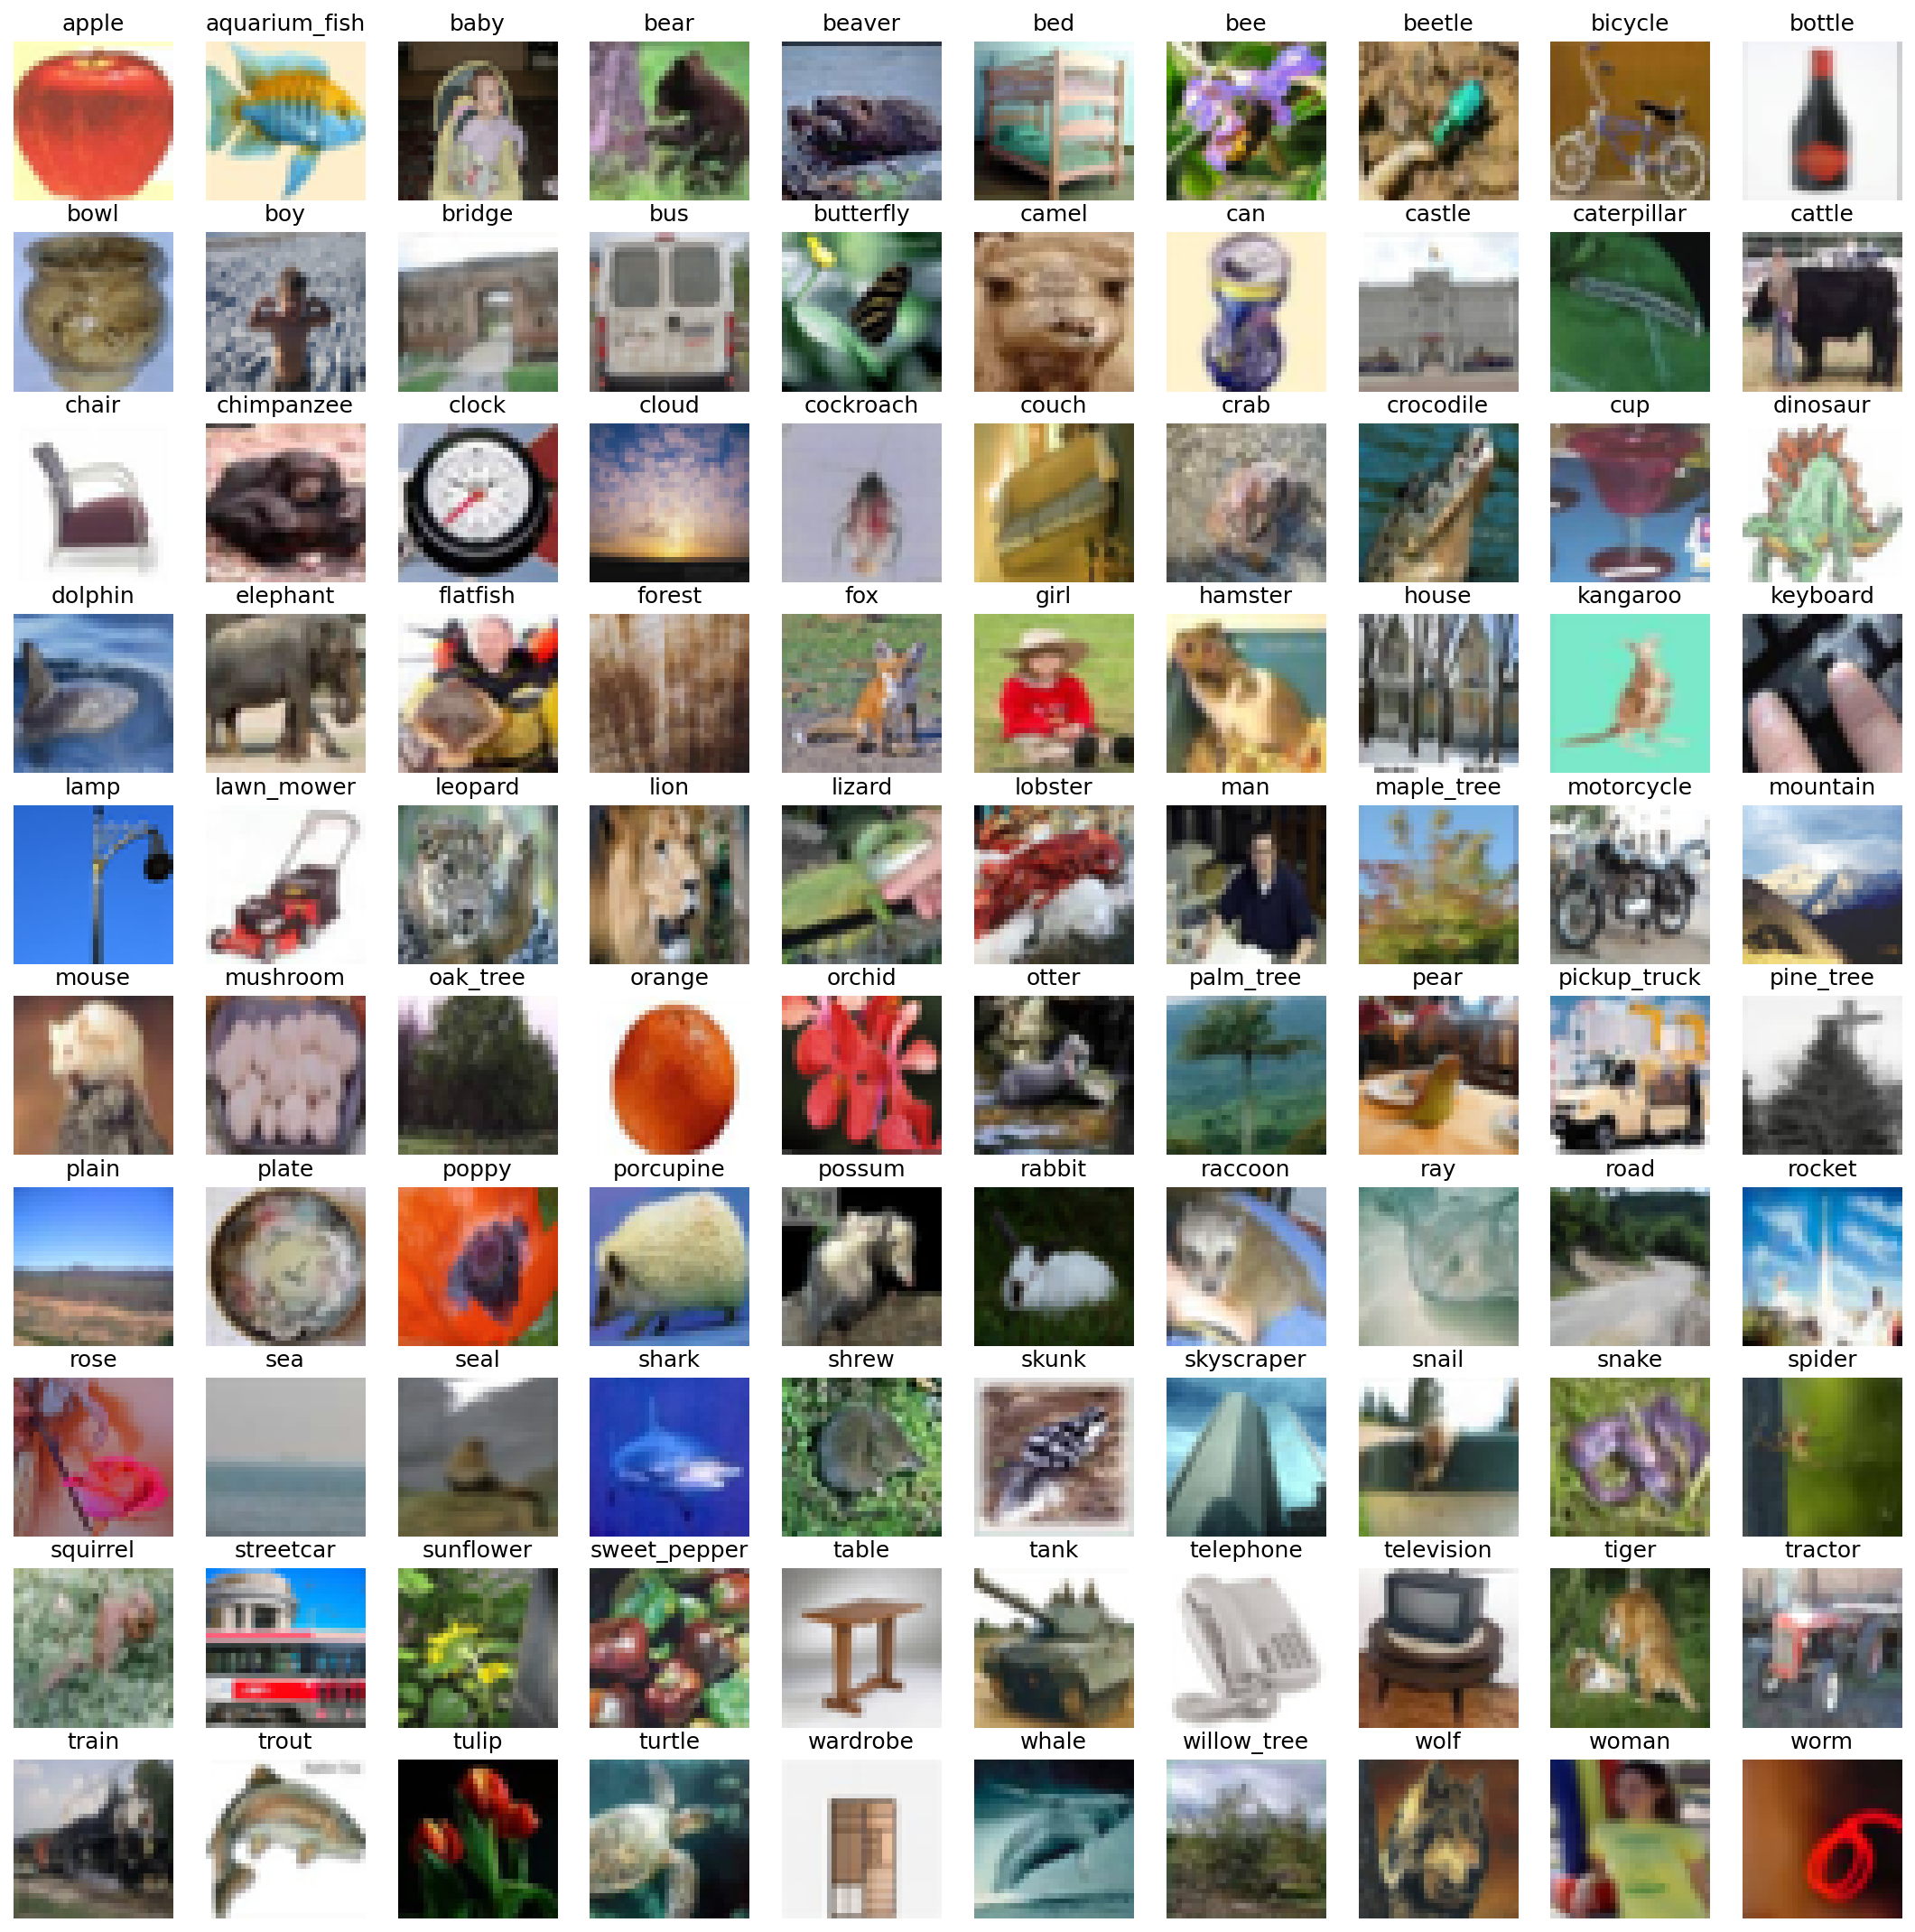

In [ ]:
# TODO: Find One Image from Each Class

# TODO: Plot Images


### Modify Model

Change the final linear layer of the model according to the new number of classes And freeze all other layers.
- Do not forgot to move model to `device`

In [ ]:
# Load Pretrained Model

# Freeze All Layers

# Modify The Last Linear Layer

# Move Model to Device


### Criterion & Optimizater

Define `criterion` and `optimizer` (Or `scheduler`)

In [ ]:
# TODO: Define Loss and Optimizer

### Train

Train the Model (Only Last Layer)

In [ ]:
# TODO: Train The Model



Epoch [1/20], Loss: 3.5431, Train Accuracy: 16.24%
Epoch [2/20], Loss: 2.9208, Train Accuracy: 27.24%
Epoch [3/20], Loss: 2.7093, Train Accuracy: 32.05%
Epoch [4/20], Loss: 2.5783, Train Accuracy: 34.60%
Epoch [5/20], Loss: 2.4907, Train Accuracy: 36.57%
Epoch [6/20], Loss: 2.4149, Train Accuracy: 38.04%
Epoch [7/20], Loss: 2.3469, Train Accuracy: 39.85%
Epoch [8/20], Loss: 2.3046, Train Accuracy: 40.97%
Epoch [9/20], Loss: 2.2563, Train Accuracy: 41.93%
Epoch [10/20], Loss: 2.2226, Train Accuracy: 42.59%
Epoch [11/20], Loss: 2.1876, Train Accuracy: 43.60%
Epoch [12/20], Loss: 2.1510, Train Accuracy: 44.40%
Epoch [13/20], Loss: 2.1276, Train Accuracy: 44.95%
Epoch [14/20], Loss: 2.1030, Train Accuracy: 45.52%
Epoch [15/20], Loss: 2.0783, Train Accuracy: 46.25%
Epoch [16/20], Loss: 2.0583, Train Accuracy: 46.37%
Epoch [17/20], Loss: 2.0441, Train Accuracy: 46.55%
Epoch [18/20], Loss: 2.0261, Train Accuracy: 47.11%
Epoch [19/20], Loss: 2.0022, Train Accuracy: 47.72%
Epoch [20/20], Loss: 

### Test

Evaluate the Model on CIFAR-100 Test Set. 40% accuracy is sufficient.


In [ ]:
# TODO: Evaluate Model on CIFAR100

# TODO: Print Accuracy


Test Accuracy on CIFAR-100: 44.18%


### Question
You might think that 40% accuracy is quite low. However, first of all, consider that the classification is done over 100 classes. The accuracy of a random model in this case is 1%. Also, we only changed one linear layer of the model, and the rest of the weights remained unchanged. What do you think is the reason the model can achieve a reasonably good generalization ability on a completely new dataset with just the change of one linear layer at the end?

Answer:

### Visualize incorrectly predicted samples from testset

Visualize *10* random images from testset that are incorrectly predicted by the model

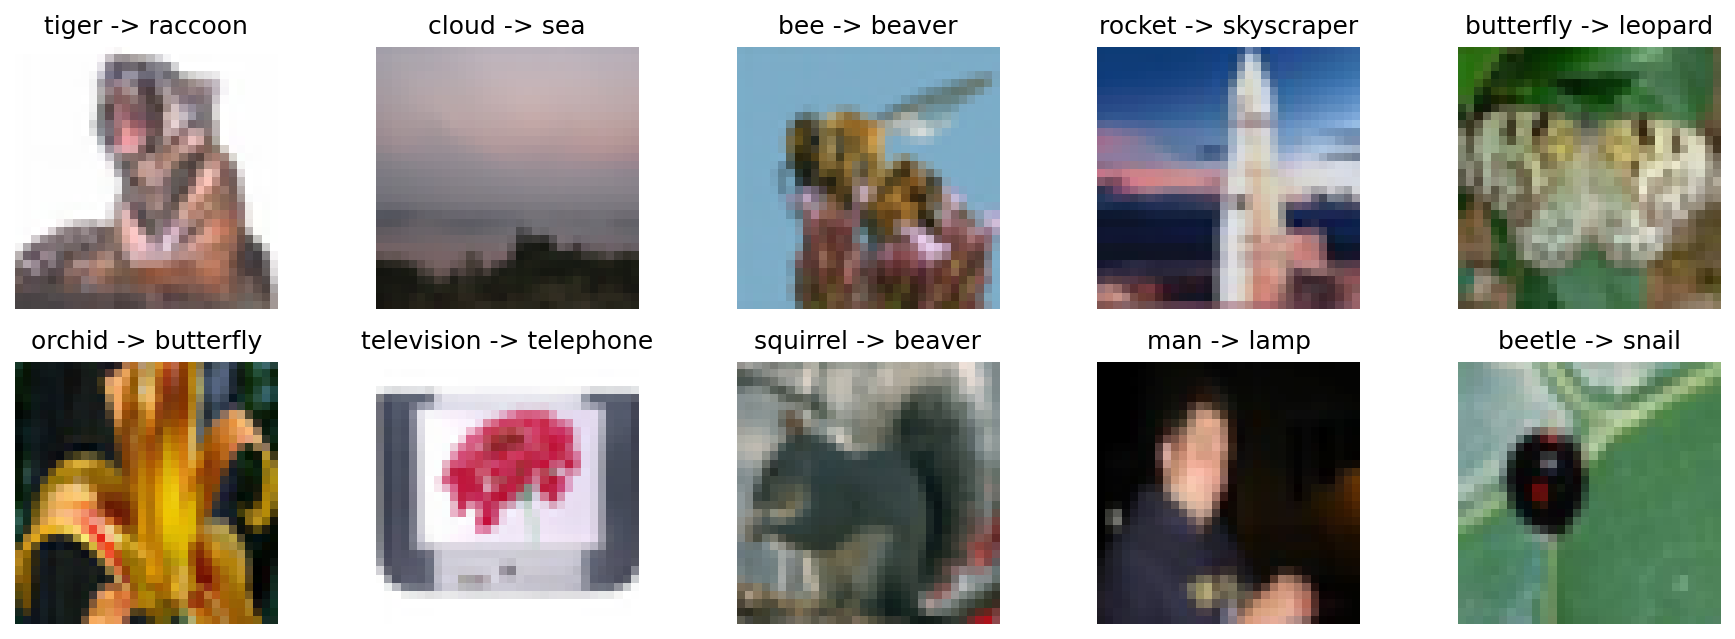

In [ ]:
# TODO: Plot Samples with Wrong Predicted Classes

### Plot accuracy for each class

Plot accuracy of model on testset for each class.

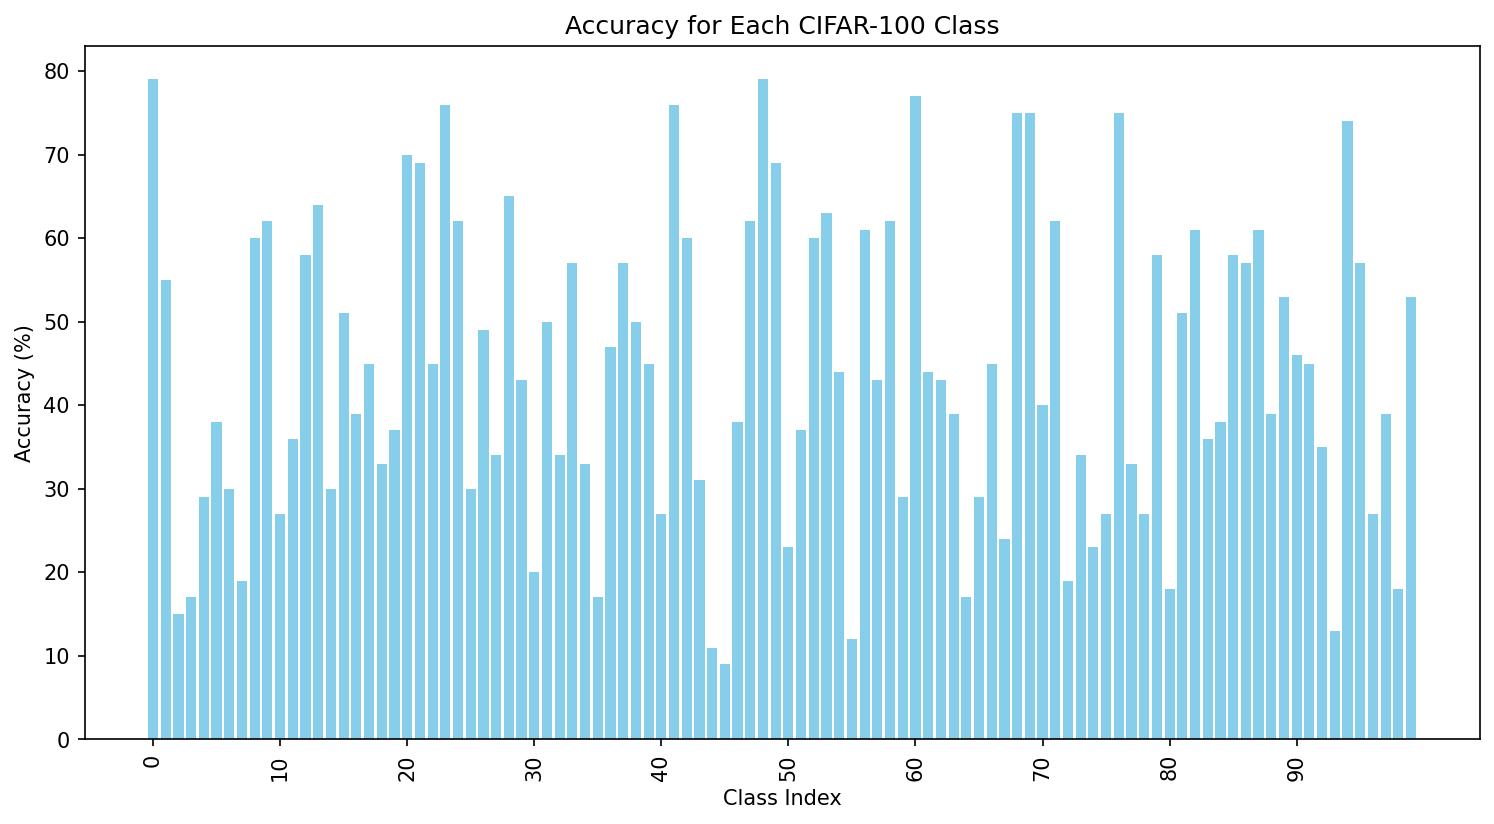

In [ ]:
# TODO: Calculate Accuracy for Each Class

# TODO: Plot Class-Wise Accuracy


### The classes with the best and worst accuracy

Based on the results from the previous section, obtain the 5 classes with the best accuracy and the 5 classes with the worst accuracy on the testset, and display one sample from each of them.

Top 3 Best Performing Classes: [41 23 60 48  0]
Top 3 Worst Performing Classes: [45 44 55 93  2]


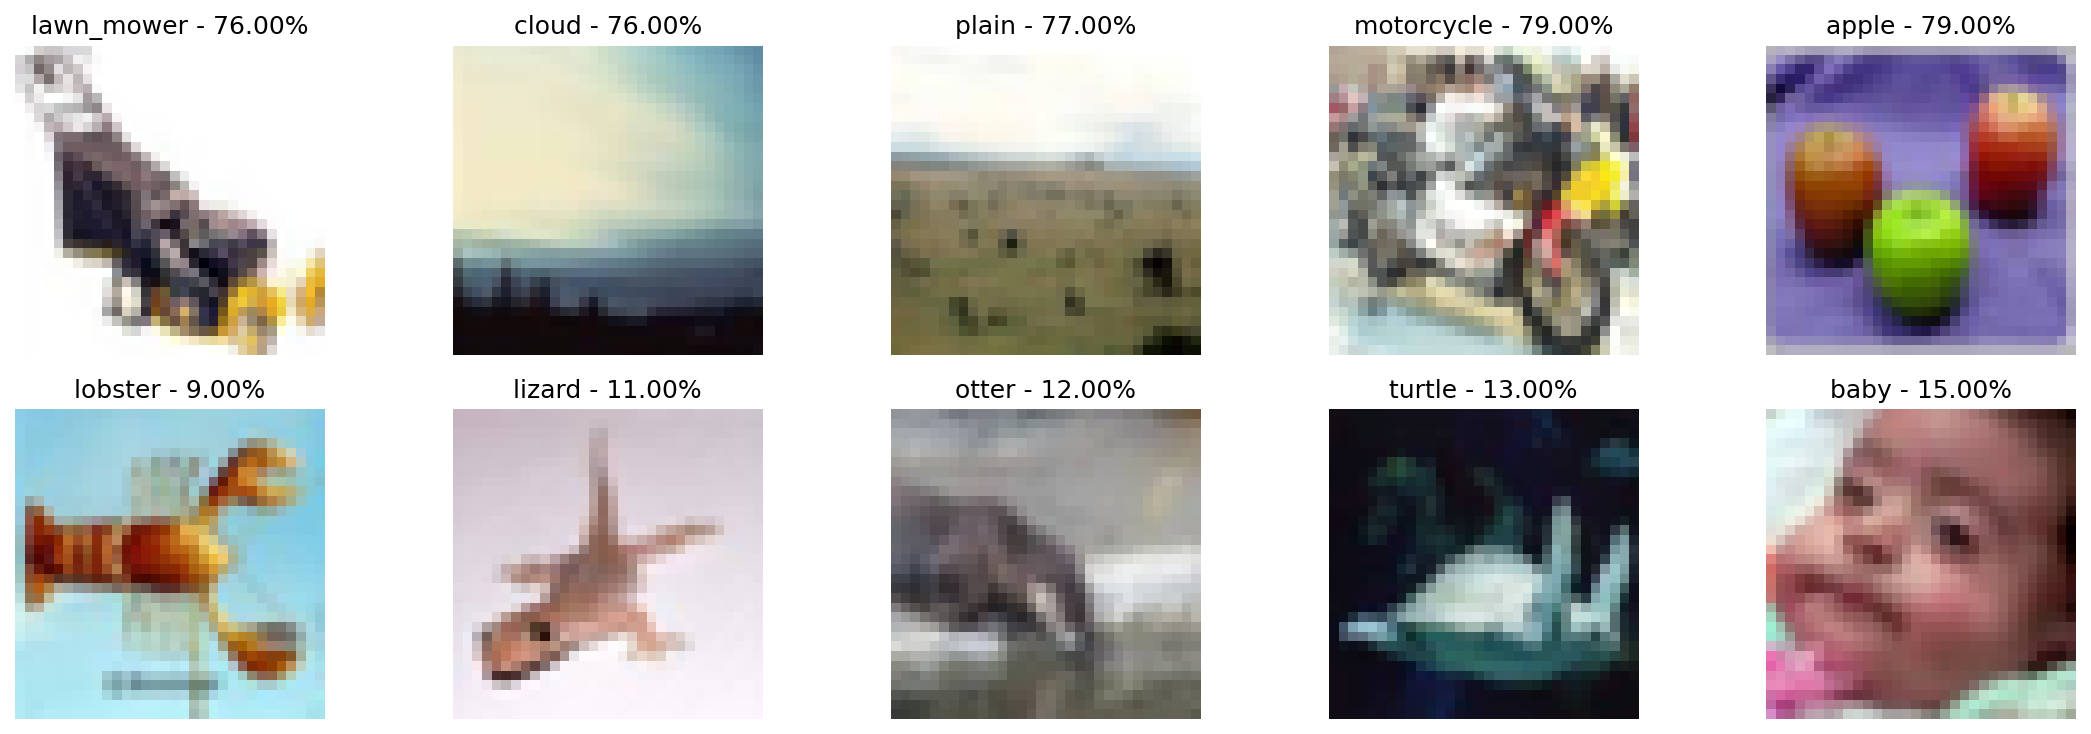

In [ ]:
# TODO: Find Top 5 Best and Worst Performing Classes

# Plot a Sample Image From Each of The Best and Worst Performing Classes


### Question
What do you think is the reason for the significant accuracy difference between different classes? What differences do you observe between the classes with the best and worst accuracy? Can you provide an analysis of the results and relate them to the model’s feature space?

Answer: